# ***优化算法***

# 0. 要解决的问题

① 到目前为止，你一直使用梯度下降来更新参数并使损失降至最低。

② 在本笔记中，你将学习更多高级的优化方法，以加快学习速度，甚至可以使你的损失函数获得更低的最终值。

③ 一个好的优化算法可以使需要训练几天的网络，训练仅仅几个小时就能获得良好的结果。

④ 梯度下降好比在损失函数$J$上“下坡”，如下图所示。

<img src="images/cost.jpg" style="zoom:40%;" />

<center>图1：损失最小化好比在丘陵景观中寻找最低点</center>

① 在训练的每个步骤中，你都按照一定的方向更新参数，以尝试到达最低点。

② 符号：与往常一样，$\frac{\partial J}{\partial a } =da$适用于任何变量a。

# 1. 导入库

① 首先，请运行以下代码以导入所需的库。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import math
import sklearn
import sklearn.datasets

from opt_utils import load_params_and_grads, initialize_parameters, forward_propagation, backward_propagation
from opt_utils import compute_cost, predict, predict_dec, plot_decision_boundary, load_dataset
from testCases import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# 2. 批量梯度下降

① 机器学习中一种简单的优化方法是梯度下降（gradient descent,GD）。当你对每个step中的所有示例执行梯度计算步骤时，它也叫做“批量梯度下降”。

② 热身练习：实现梯度下降更新方法。 对于$l = 1, ..., L$，梯度下降规则为：

$$W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{1}$$
$$b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{2}$$

③ 其中L是层数，$\alpha$是学习率。所有参数都应存储在 parameters 字典中。

④ 请注意，迭代器 l 在 for 循环中从0开始，而第一个参数是$W^{[1]}$和$b^{[1]}$。编码时需要将l转换为l+1。

In [3]:
def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    使用梯度下降更新参数
    
    参数：
        parameters - 字典，包含了要更新的参数：
            parameters['W' + str(l)] = Wl
            parameters['b' + str(l)] = bl
        grads - 字典，包含了每一个梯度值用以更新参数
            grads['dW' + str(l)] = dWl
            grads['db' + str(l)] = dbl
        learning_rate - 学习率
        
    返回值：
        parameters - 字典，包含了更新后的参数
    """

    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] -learning_rate*grads["db" + str(l+1)]
        
    return parameters

In [4]:
print("-----------------测试update_parameters_with_gd-----------------")
parameters, grads, learning_rate = update_parameters_with_gd_test_case()
parameters = update_parameters_with_gd(parameters, grads, learning_rate)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

-----------------测试update_parameters_with_gd-----------------
W1 = [[ 1.63535156 -0.62320365 -0.53718766]
 [-1.07799357  0.85639907 -2.29470142]]
b1 = [[ 1.74604067]
 [-0.75184921]]
W2 = [[ 0.32171798 -0.25467393  1.46902454]
 [-2.05617317 -0.31554548 -0.3756023 ]
 [ 1.1404819  -1.09976462 -0.1612551 ]]
b2 = [[-0.88020257]
 [ 0.02561572]
 [ 0.57539477]]


① 它的一种变体是随机梯度下降（SGD），它相当于mini版的批次梯度下降，其中每个mini-batch只有一个数据实例。刚刚实现的更新规则不会更改。

② 也就是说，SGD一次仅在一个训练数据上计算梯度，而不是在整个训练集合上计算梯度。

③ 下面的代码示例说明了随机梯度下降和（批量）梯度下降之间的区别。


In [5]:
#仅做比较，不运行。

#批量梯度下降，又叫梯度下降
X = data_input
Y = labels

parameters = initialize_parameters(layers_dims)
for i in range(0,num_iterations):
    #前向传播
    A,cache = forward_propagation(X,parameters)
    #计算损失
    cost = compute_cost(A,Y)
    #反向传播
    grads = backward_propagation(X,Y,cache)
    #更新参数
    parameters = update_parameters(parameters,grads)

#随机梯度下降算法：
X = data_input
Y = labels
parameters = initialize_parameters(layers_dims)
for i in (0,num_iterations):
    for j in m:
        #前向传播
        A,cache = forward_propagation(X,parameters)
        #计算成本
        cost = compute_cost(A,Y)
        #后向传播
        grads = backward_propagation(X,Y,cache)
        #更新参数
        parameters = update_parameters(parameters,grads)

NameError: name 'data_input' is not defined

① 对于随机梯度下降，在更新梯度之前，只使用1个训练样例。

② 当训练集大时，SGD可以更新的更快。但是这些参数会向最小值“摆动”而不是平稳地收敛。

③ 下图是一个演示例子：

<img src="images/kiank_sgd.png" style="zoom:80%;" />

<center>图2：SGD vs GD</center>
① “+”表示损失的最小值。 SGD造成许多振荡以达到收敛。但是每个step中，计算SGD比使用GD更快，因为它仅使用一个训练示例（相对于GD的整个批次）。

② 注意：实现SGD总共需要3个for循环：

 1. 迭代次数
 2. m个训练数据
 3. 各层上（要更新所有参数，从$(W^{[1]},b^{[1]})$到$(W^{[L]},b^{[L]})$
① 实际上，如果你既不使用整个训练集也不使用一个训练示例来执行每次更新，则通常会得到更快的结果。

② 小批量梯度下降法在每个步骤中使用中间数量的示例。通过小批量梯度下降，你可以遍历小批量，而不是遍历各个训练示例。

<img src="images/kiank_minibatch.png" style="zoom:80%;" />

<center>图3：SGD vs Mini-Batch GD</center>
① “+”表示损失的最小值。在优化算法中使用mini-batch批处理通常可以加快优化速度。

② 你应该记住：

 - 梯度下降，小批量梯度下降和随机梯度下降之间的差异是用于执行一个更新步骤的数据数量。
 - 必须调整超参数学习率$\alpha$。
 - 在小批量的情况下，通常它会胜过梯度下降或随机梯度下降（尤其是训练集较大时）。

# 3. Mini-Batch梯度下降

① 让我们学习如何从训练集（X，Y）中构建小批次数据。

② 分两个步骤：

Shuffle：如下所示，创建训练集（X，Y）的随机打乱版本。X和Y中的每一列代表一个训练示例。

注意，随机打乱是在X和Y之间同步完成的。这样，在随机打乱之后，X的$i^{th}$列就是对应于Y中$i^{th}$标签的示例。打乱步骤可确保该示例将随机分为不同小批。

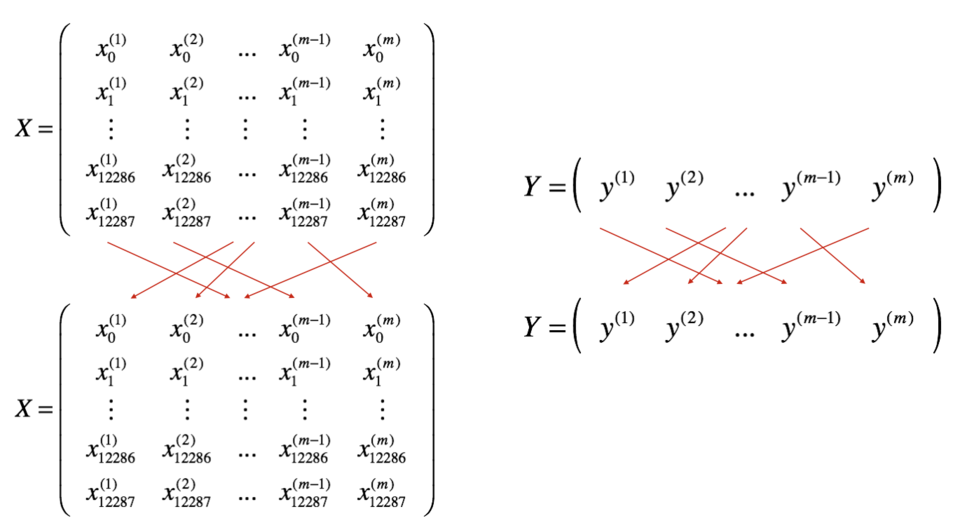

Partition：将打乱后的（X，Y）划分为大小为mini_batch_size（此处为64）的小批处理。

请注意，训练示例的数量并不总是可以被mini_batch_size整除。最后的小批量可能较小，但是你不必担心，当最终的迷你批处理小于完整的mini_batch_size时，它将如下图所示：

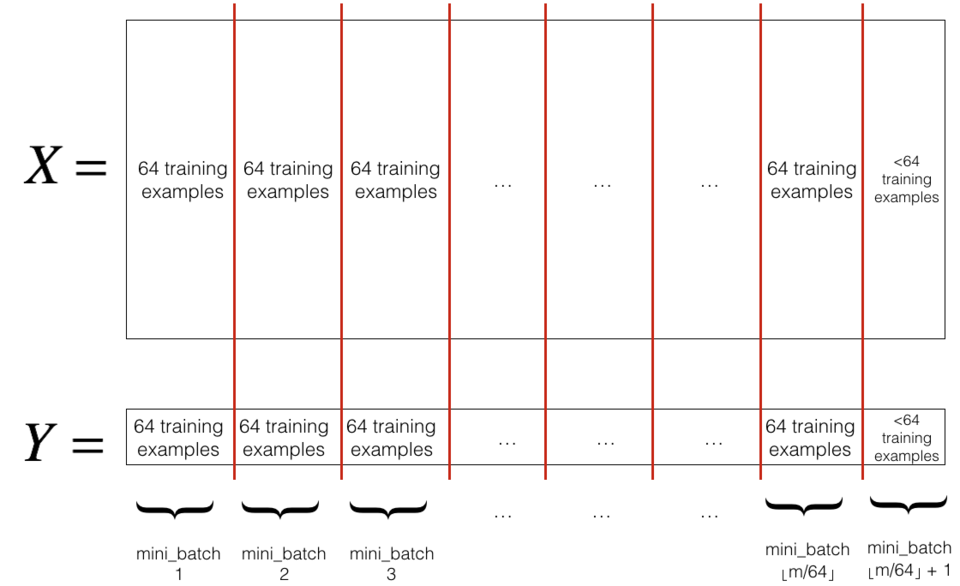

③ 练习：实现`random_mini_batches`。我们为你编码好了shuffling部分。为了帮助你实现partitioning部分，我们为你提供了以下代码，用于选择和小批次的索引：

In [ ]:
'''
first_mini_batch_X = shuffled_X[:, 0 : mini_batch_size]  
second_mini_batch_X = shuffled_X[:, mini_batch_size : 2 * mini_batch_size]  
...
'''

'\nfirst_mini_batch_X = shuffled_X[:, 0 : mini_batch_size]  \nsecond_mini_batch_X = shuffled_X[:, mini_batch_size : 2 * mini_batch_size]  \n...\n'

请注意，最后一个小批次的结果可能小于mini_batch_size=64。

① 令$\lfloor s \rfloor$代表$s$向下舍入到最接近的整数（在Python中为math.floor（s））。

② 如果示例总数不是mini_batch_size = 64的倍数，则将有$\lfloor \frac{m}{mini\_batch\_size}\rfloor$个带有完整示例的小批次，数量为64最终的一批次中的示例将是$(m-mini_\_batch_\_size \times \lfloor \frac{m}{mini\_batch\_size}\rfloor)$

In [6]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):    
    """
    从（X，Y）中创建一个随机的mini-batch列表
    
    参数：
        X - 输入数据，维度为(输入节点数量，样本的数量)
        Y - 对应的是X的标签，【1 | 0】（蓝|红），维度为(1,样本的数量)
        mini_batch_size - 每个mini-batch的样本数量
        
    返回：
        mini-bacthes - 一个同步列表，维度为（mini_batch_X,mini_batch_Y）
        
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    """
    #注：
    #如果你不好理解的话请看一下下面的伪代码，看看X和Y是如何根据permutation来打乱顺序的。
    x = np.array([[1,2,3,4,5,6,7,8,9],
                  [9,8,7,6,5,4,3,2,1]])
    y = np.array([[1,0,1,0,1,0,1,0,1]])

    random_mini_batches(x,y)
    permutation= [7, 2, 1, 4, 8, 6, 3, 0, 5]
    shuffled_X= [[8 3 2 5 9 7 4 1 6]
                 [2 7 8 5 1 3 6 9 4]]
    shuffled_Y= [[0 1 0 1 1 1 0 1 0]]
    """
    
    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : (k+1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k+1) * mini_batch_size]
        
        """
        #注：
        #如果你不好理解的话请单独执行下面的代码，它可以帮你理解一些。
        a = np.array([[1,2,3,4,5,6,7,8,9],
                      [9,8,7,6,5,4,3,2,1],
                      [1,2,3,4,5,6,7,8,9]])
        k=1
        mini_batch_size=3
        print(a[:,1*3:(1+1)*3]) #从第4列到第6列
        '''
        [[4 5 6]
         [6 5 4]
         [4 5 6]]
        '''
        k=2
        print(a[:,2*3:(2+1)*3]) #从第7列到第9列
        '''
        [[7 8 9]
         [3 2 1]
         [7 8 9]]
        '''

        #看一下每一列的数据你可能就会好理解一些
        """

        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    #如果训练集的大小刚好是mini_batch_size的整数倍，那么这里已经处理完了
    #如果训练集的大小不是mini_batch_size的整数倍，那么最后肯定会剩下一些，我们要把它处理了
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        #获取最后剩余的部分
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]

        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches

In [7]:
print("-----------------测试random_mini_batches-----------------")
X_assess, Y_assess, mini_batch_size = random_mini_batches_test_case()
mini_batches = random_mini_batches(X_assess, Y_assess, mini_batch_size)

print ("shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("shape of the 3rd mini_batch_X: " + str(mini_batches[2][0].shape))
print ("shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("shape of the 3rd mini_batch_Y: " + str(mini_batches[2][1].shape))
print ("mini batch sanity check: " + str(mini_batches[0][0][0][0:3]))

-----------------测试random_mini_batches-----------------
shape of the 1st mini_batch_X: (12288, 64)
shape of the 2nd mini_batch_X: (12288, 64)
shape of the 3rd mini_batch_X: (12288, 20)
shape of the 1st mini_batch_Y: (1, 64)
shape of the 2nd mini_batch_Y: (1, 64)
shape of the 3rd mini_batch_Y: (1, 20)
mini batch sanity check: [ 0.90085595 -0.7612069   0.2344157 ]


# 4. Momentum梯度下降

① 因为小批量梯度下降仅在看到示例的子集后才进行参数更新，所以更新的方向具有一定的差异，因此小批量梯度下降所采取的路径将“朝着收敛”振荡。利用动量则可以减少这些振荡。

② 动量考虑了过去的梯度以平滑更新。我们将先前梯度的“方向”存储在变量中。

③ 这将是先前步骤中梯度的指数加权平均值，你也可以将看作是下坡滚动的球的“速度”，根据山坡的坡度/坡度的方向来提高速度（和动量）。

<img src="images/opt_momentum.png" style="zoom:60%;" />

① 红色箭头显示了带动量的小批次梯度下降步骤所采取的方向。

② 蓝点表示每一步的梯度方向（相对于当前的小批量）。

③ 让梯度影响而不是仅遵循梯度，然后朝的方向迈出一步。

练习：初始化速度。速度是一个Python字典，需要使用零数组进行初始化。它的键与grads词典中的键相同，即：$l =1,...,L$

In [8]:
'''
v["dW" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l+1)])  
v["db" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l+1)])

note:注意：迭代器l在for循环中从0开始，而第一个参数是v["dW1"]和v["db1"]（在上标中为“1”）。这就是为什么我们在“for”循环中将l转换为l+1的原因。
'''

'\nv["dW" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l+1)])  \nv["db" + str(l+1)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l+1)])\n\nnote:注意：迭代器l在for循环中从0开始，而第一个参数是v["dW1"]和v["db1"]（在上标中为“1”）。这就是为什么我们在“for”循环中将l转换为l+1的原因。\n'

练习：实现带动量的参数更新。动量更新规则是，对于 $l = 1, ..., L$

$$\begin{cases}  
v_{dW^{[l]}} = \beta v_{dW^{[l]}} + (1 - \beta) dW^{[l]} \\  
W^{[l]} = W^{[l]} - \alpha v_{dW^{[l]}}  
\end{cases}\tag{3}$$

$$\begin{cases}  
v_{db^{[l]}} = \beta v_{db^{[l]}} + (1 - \beta) db^{[l]} \\  
b^{[l]} = b^{[l]} - \alpha v_{db^{[l]}}   
\end{cases}\tag{4}$$

其中L是层数，$\beta$ 是动量，$\alpha$ 是学习率。所有参数都应存储在parameters字典中。

请注意，迭代器l在for循环中从0开始，而第一个参数是$W^{[1]}$和$b^{[1]}$（在上标中为“1”）。因此，编码时需要将l转化至l+1。

注意：

 - 速度用零初始化。因此，该算法将花费一些迭代来“提高”速度并开始采取更大的步骤。
 - 如果$\beta = 0$，则它变为没有动量的标准梯度下降。

怎样选择$\beta$?

 - 动量越大，更新越平滑，因为我们对过去的梯度的考虑也更多。但是，如果太大，也可能使更新变得过于平滑。
 - $\beta$的常用值范围是0.8到0.999。
 - 如果你不想调整它，则通常是一个合理的默认值。
调整模型的最佳可能需要尝试几个值，以了解在降低损失函数的值方面最有效的方法。

你应该记住：

 - 动量将过去的梯度考虑在内，以平滑梯度下降的步骤。它可以应用于批量梯度下降，小批次梯度下降或随机梯度下降。
 - 必须调整动量超参数和学习率$\alpha$。

In [9]:
def initialize_velocity(parameters):
    """
    初始化速度，velocity是一个字典：
        - keys: "dW1", "db1", ..., "dWL", "dbL" 
        - values:与相应的梯度/参数维度相同的值为零的矩阵。
    参数：
        parameters - 一个字典，包含了以下参数：
            parameters["W" + str(l)] = Wl
            parameters["b" + str(l)] = bl
    返回:
        v - 一个字典变量，包含了以下参数：
            v["dW" + str(l)] = dWl的速度
            v["db" + str(l)] = dbl的速度
    
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    # Initialize velocity
    for l in range(L):
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l+1)] = np.zeros(parameters['W' + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters['b' + str(l+1)].shape)
        ### END CODE HERE ###
        
    return v

In [10]:
print("-----------------测试initialize_velocity-----------------")
parameters = initialize_velocity_test_case()

v = initialize_velocity(parameters)
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))

-----------------测试initialize_velocity-----------------
v["dW1"] = [[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = [[0.]
 [0.]]
v["dW2"] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = [[0.]
 [0.]
 [0.]]


In [11]:
# GRADED FUNCTION: update_parameters_with_momentum

def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    使用动量更新参数
    参数：
        parameters - 一个字典类型的变量，包含了以下字段：
            parameters["W" + str(l)] = Wl
            parameters["b" + str(l)] = bl
        grads - 一个包含梯度值的字典变量，具有以下字段：
            grads["dW" + str(l)] = dWl
            grads["db" + str(l)] = dbl
        v - 包含当前速度的字典变量，具有以下字段：
            v["dW" + str(l)] = ...
            v["db" + str(l)] = ...
        beta - 超参数，动量，实数
        learning_rate - 学习率，实数
    返回：
        parameters - 更新后的参数字典
        v - 包含了更新后的速度变量
    """

    L = len(parameters) // 2 # number of layers in the neural networks
    
    # Momentum update for each parameter
    for l in range(L):
        
        ### START CODE HERE ### (approx. 4 lines)
        # compute velocities
        v["dW" + str(l + 1)] = beta*v["dW" + str(l + 1)]+(1-beta)*grads['dW' + str(l+1)]
        v["db" + str(l + 1)] = beta*v["db" + str(l + 1)]+(1-beta)*grads['db' + str(l+1)]
        # update parameters
        parameters["W" + str(l + 1)] = parameters['W' + str(l+1)] - learning_rate*v["dW" + str(l + 1)] 
        parameters["b" + str(l + 1)] = parameters['b' + str(l+1)] - learning_rate*v["db" + str(l + 1)] 
        ### END CODE HERE ###
        
    return parameters, v 

In [12]:
print("-----------------测试update_parameters_with_momentum-----------------")
parameters, grads, v = update_parameters_with_momentum_test_case()
parameters, v = update_parameters_with_momentum(parameters, grads, v, beta = 0.9, learning_rate = 0.01)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))

-----------------测试update_parameters_with_momentum-----------------
W1 = [[ 1.62544598 -0.61290114 -0.52907334]
 [-1.07347112  0.86450677 -2.30085497]]
b1 = [[ 1.74493465]
 [-0.76027113]]
W2 = [[ 0.31930698 -0.24990073  1.4627996 ]
 [-2.05974396 -0.32173003 -0.38320915]
 [ 1.13444069 -1.0998786  -0.1713109 ]]
b2 = [[-0.87809283]
 [ 0.04055394]
 [ 0.58207317]]
v["dW1"] = [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = [[-0.01228902]
 [-0.09357694]]
v["dW2"] = [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = [[0.02344157]
 [0.16598022]
 [0.07420442]]


 # 5. Adam

① Adam是训练神经网络最有效的优化算法之一。它结合了RMSProp和Momentum的优点。

② Adam原理

1. 计算过去梯度的指数加权平均值，并将其存储在变量$v$（使用偏差校正之前）和$v^{corrected}$（使用偏差校正）中。
2. 计算过去梯度的平方的指数加权平均值，并将其存储在变量$s$（偏差校正之前）和$s^{corrected}$（偏差校正中）中。
3. 组合“1”和“2”的信息，在一个方向上更新参数。

③ 对于$l = 1, ..., L$，更新规则为：

$$\begin{cases}  
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\  
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\  
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\  
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_1)^t} \\  
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}  
\end{cases}$$

④ 其中：

1. t计算出Adam采取的步骤数
2. L是层数
3. $\beta_1$和$\beta_2$是控制两个指数加权平均值的超参数。
4. $\alpha$是学习率
5. $\varepsilon$是一个很小的数字，以避免被零除

⑤ 和之前一样，我们将所有参数存储在parameters字典中

练习：初始化跟踪过去信息的Adam变量$v, s$

说明：变量$v, s$是需要用零数组初始化的python字典。它们的key与grads的key相同，即：对于$$l = 1, ..., L$$

In [13]:
def initialize_adam(parameters) :
    """
    初始化v和s，它们都是字典类型的变量，都包含了以下字段：
        - keys: "dW1", "db1", ..., "dWL", "dbL" 
        - values：与对应的梯度/参数相同维度的值为零的numpy矩阵
    
    参数：
        parameters - 包含了以下参数的字典变量：
            parameters["W" + str(l)] = Wl
            parameters["b" + str(l)] = bl
    返回：
        v - 包含梯度的指数加权平均值，字段如下：
            v["dW" + str(l)] = ...
            v["db" + str(l)] = ...
        s - 包含平方梯度的指数加权平均值，字段如下：
            s["dW" + str(l)] = ...
            s["db" + str(l)] = ...
    
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(L):
    ### START CODE HERE ### (approx. 4 lines)
        v["dW" + str(l + 1)] = np.zeros(parameters["W" + str(l+1)].shape)
        v["db" + str(l + 1)] = np.zeros(parameters["b" + str(l+1)].shape)
        s["dW" + str(l + 1)] = np.zeros(parameters["W" + str(l+1)].shape)
        s["db" + str(l + 1)] = np.zeros(parameters["b" + str(l+1)].shape)
        ### END CODE HERE ###
    
    return v, s 

In [14]:
print("-----------------测试initialize_adam-----------------")
parameters = initialize_adam_test_case()
v, s = initialize_adam(parameters)
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))
print("s[\"dW1\"] = " + str(s["dW1"]))
print("s[\"db1\"] = " + str(s["db1"]))
print("s[\"dW2\"] = " + str(s["dW2"]))
print("s[\"db2\"] = " + str(s["db2"])) 

-----------------测试initialize_adam-----------------
v["dW1"] = [[0. 0. 0.]
 [0. 0. 0.]]
v["db1"] = [[0.]
 [0.]]
v["dW2"] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
v["db2"] = [[0.]
 [0.]
 [0.]]
s["dW1"] = [[0. 0. 0.]
 [0. 0. 0.]]
s["db1"] = [[0.]
 [0.]]
s["dW2"] = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
s["db2"] = [[0.]
 [0.]
 [0.]]


练习：用Adam实现参数更新。回想一下一般的更新规则是，对于$l = 1, ..., L$

$$\begin{cases}  
v_{W^{[l]}} = \beta_1 v_{W^{[l]}} + (1 - \beta_1) \frac{\partial J }{ \partial W^{[l]} } \\  
v^{corrected}_{W^{[l]}} = \frac{v_{W^{[l]}}}{1 - (\beta_1)^t} \\  
s_{W^{[l]}} = \beta_2 s_{W^{[l]}} + (1 - \beta_2) (\frac{\partial J }{\partial W^{[l]} })^2 \\  
s^{corrected}_{W^{[l]}} = \frac{s_{W^{[l]}}}{1 - (\beta_2)^t} \\  
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{W^{[l]}}}{\sqrt{s^{corrected}_{W^{[l]}}}+\varepsilon}  
\end{cases}$$

注意：迭代器 l 在 for 循环中从0开始，而第一个参数是$W^{[1]}$和$b^{[1]}$。编码时需要将 l 转换为 l+1 。

In [15]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    使用Adam更新参数
    
    参数：
        parameters - 包含了以下字段的字典：
            parameters['W' + str(l)] = Wl
            parameters['b' + str(l)] = bl
        grads - 包含了梯度值的字典，有以下key值：
            grads['dW' + str(l)] = dWl
            grads['db' + str(l)] = dbl
        v - Adam的变量，第一个梯度的移动平均值，是一个字典类型的变量
        s - Adam的变量，平方梯度的移动平均值，是一个字典类型的变量
        t - 当前迭代的次数
        learning_rate - 学习率
        beta1 - 动量，超参数,用于第一阶段，使得曲线的Y值不从0开始（参见天气数据的那个图）
        beta2 - RMSprop的一个参数，超参数
        epsilon - 防止除零操作（分母为0）
    
    返回：
        parameters - 更新后的参数
        v - 第一个梯度的移动平均值，是一个字典类型的变量
        s - 平方梯度的移动平均值，是一个字典类型的变量
    """
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(L):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l + 1)] = beta1*v["dW" + str(l + 1)] +(1-beta1)*grads['dW' + str(l+1)]
        v["db" + str(l + 1)] = beta1*v["db" + str(l + 1)] +(1-beta1)*grads['db' + str(l+1)]
        ### END CODE HERE ###

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        ### START CODE HERE ### (approx. 2 lines)
        v_corrected["dW" + str(l + 1)] = v["dW" + str(l + 1)]/(1-(beta1)**t)
        v_corrected["db" + str(l + 1)] = v["db" + str(l + 1)]/(1-(beta1)**t)
        ### END CODE HERE ###

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        ### START CODE HERE ### (approx. 2 lines)
        s["dW" + str(l + 1)] =beta2*s["dW" + str(l + 1)] + (1-beta2)*(grads['dW' + str(l+1)]**2)
        s["db" + str(l + 1)] = beta2*s["db" + str(l + 1)] + (1-beta2)*(grads['db' + str(l+1)]**2)
        ### END CODE HERE ###

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        ### START CODE HERE ### (approx. 2 lines)
        s_corrected["dW" + str(l + 1)] =s["dW" + str(l + 1)]/(1-(beta2)**t)
        s_corrected["db" + str(l + 1)] = s["db" + str(l + 1)]/(1-(beta2)**t)
        ### END CODE HERE ###

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        ### START CODE HERE ### (approx. 2 lines)
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)]-learning_rate*(v_corrected["dW" + str(l + 1)]/np.sqrt( s_corrected["dW" + str(l + 1)]+epsilon))
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)]-learning_rate*(v_corrected["db" + str(l + 1)]/np.sqrt( s_corrected["db" + str(l + 1)]+epsilon))
        ### END CODE HERE ###
        
    return parameters, v, s 

In [16]:
print("-----------------测试update_parameters_with_adam-----------------")
parameters, grads, v, s = update_parameters_with_adam_test_case()
parameters, v, s  = update_parameters_with_adam(parameters, grads, v, s, t = 2)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
print("v[\"dW1\"] = " + str(v["dW1"]))
print("v[\"db1\"] = " + str(v["db1"]))
print("v[\"dW2\"] = " + str(v["dW2"]))
print("v[\"db2\"] = " + str(v["db2"]))
print("s[\"dW1\"] = " + str(s["dW1"]))
print("s[\"db1\"] = " + str(s["db1"]))
print("s[\"dW2\"] = " + str(s["dW2"]))
print("s[\"db2\"] = " + str(s["db2"])) 

-----------------测试update_parameters_with_adam-----------------
W1 = [[ 1.63178673 -0.61919778 -0.53561312]
 [-1.08040999  0.85796626 -2.29409733]]
b1 = [[ 1.75225313]
 [-0.75376553]]
W2 = [[ 0.32648046 -0.25681174  1.46954931]
 [-2.05269934 -0.31497584 -0.37661299]
 [ 1.14121081 -1.09245036 -0.16498684]]
b2 = [[-0.88529978]
 [ 0.03477238]
 [ 0.57537385]]
v["dW1"] = [[-0.11006192  0.11447237  0.09015907]
 [ 0.05024943  0.09008559 -0.06837279]]
v["db1"] = [[-0.01228902]
 [-0.09357694]]
v["dW2"] = [[-0.02678881  0.05303555 -0.06916608]
 [-0.03967535 -0.06871727 -0.08452056]
 [-0.06712461 -0.00126646 -0.11173103]]
v["db2"] = [[0.02344157]
 [0.16598022]
 [0.07420442]]
s["dW1"] = [[0.00121136 0.00131039 0.00081287]
 [0.0002525  0.00081154 0.00046748]]
s["db1"] = [[1.51020075e-05]
 [8.75664434e-04]]
s["dW2"] = [[7.17640232e-05 2.81276921e-04 4.78394595e-04]
 [1.57413361e-04 4.72206320e-04 7.14372576e-04]
 [4.50571368e-04 1.60392066e-07 1.24838242e-03]]
s["db2"] = [[5.49507194e-05]
 [2.754943

现在，你学习了三种有效的优化算法（小批次梯度下降，动量，Adam）。让我们使用每个优化器来实现一个模型，并观察其中的差异。

# 6. 不同优化算法的模型

① 我们使用“moons”数据集来测试不同的优化方法。（该数据集被命名为“月亮”，因为两个类别的数据看起来有点像月牙。）

② 我们已经实现了一个三层的神经网络。你将使用以下方法进行训练：

1. 小批次 Gradient Descent：它将调用函数：
 - `update_parameters_with_gd()`
2. 小批次 动量：它将调用函数：
 - `initialize_velocity()`和 `update_parameters_with_momentum()`
3. 小批次 Adam：它将调用函数：
 - `initialize_adam()`和 `update_parameters_with_adam()`

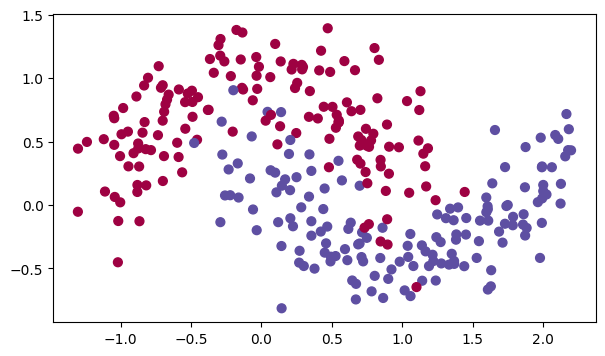

In [17]:
train_X, train_Y = load_dataset()

In [18]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True):

    """
    可以运行在不同优化器模式下的3层神经网络模型。
    
    参数：
        X - 输入数据，维度为（2，输入的数据集里面样本数量）
        Y - 与X对应的标签
        layers_dims - 包含层数和节点数量的列表
        optimizer - 字符串类型的参数，用于选择优化类型，【 "gd" | "momentum" | "adam" 】
        learning_rate - 学习率
        mini_batch_size - 每个小批量数据集的大小
        beta - 用于动量优化的一个超参数
        beta1 - 用于计算梯度后的指数衰减的估计的超参数
        beta1 - 用于计算平方梯度后的指数衰减的估计的超参数
        epsilon - 用于在Adam中避免除零操作的超参数，一般不更改
        num_epochs - 整个训练集的遍历次数，（视频2.9学习率衰减，1分55秒处，视频中称作“代”）,相当于之前的num_iteration
        print_cost - 是否打印误差值，每遍历1000次数据集打印一次，但是每100次记录一个误差值，又称每1000代打印一次
        is_plot - 是否绘制出曲线图
        
    返回：
        parameters - 包含了学习后的参数
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)

        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost
            cost = compute_cost(a3, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters 

③ 现在，你将依次使用3种优化方法来运行此神经网络：

 - 小批量梯度下降
 - 带动量的小批量梯度下降
 - 带Adam的小批量梯度下降

## 6.1 小批量梯度下降

① 运行以下代码以查看模型如何进行小批量梯度下降。

Cost after epoch 0: 0.690736
Cost after epoch 1000: 0.685273
Cost after epoch 2000: 0.647072
Cost after epoch 3000: 0.619525
Cost after epoch 4000: 0.576584
Cost after epoch 5000: 0.607243
Cost after epoch 6000: 0.529403
Cost after epoch 7000: 0.460768
Cost after epoch 8000: 0.465586
Cost after epoch 9000: 0.464518


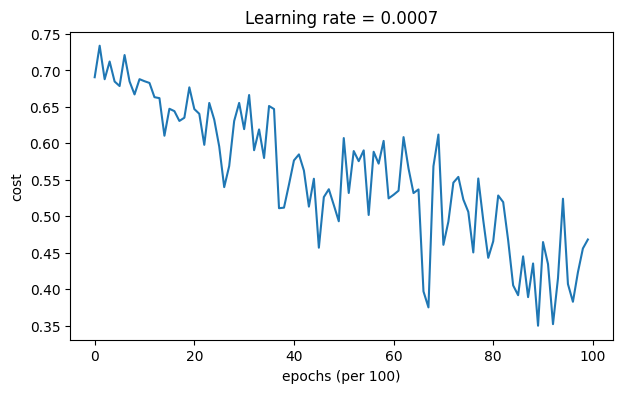

Accuracy: 0.7966666666666666


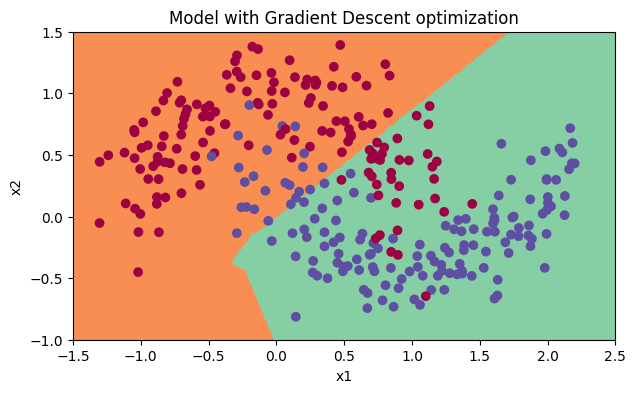

In [19]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

## 6.2 带动量的小批量梯度下降

① 运行以下代码，以查看模型如何使用动量。因为此示例相对简单，所以使用动量的收益很小。但是对于更复杂的问题，你可能会看到更大的收获。

Cost after epoch 0: 0.690741
Cost after epoch 1000: 0.685341
Cost after epoch 2000: 0.647145
Cost after epoch 3000: 0.619594
Cost after epoch 4000: 0.576665
Cost after epoch 5000: 0.607324
Cost after epoch 6000: 0.529476
Cost after epoch 7000: 0.460936
Cost after epoch 8000: 0.465780
Cost after epoch 9000: 0.464740


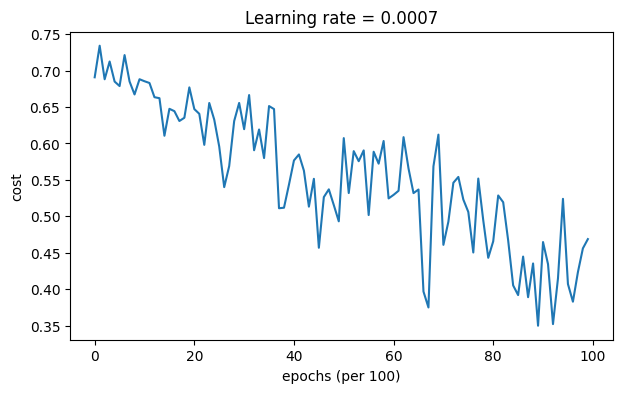

Accuracy: 0.7966666666666666


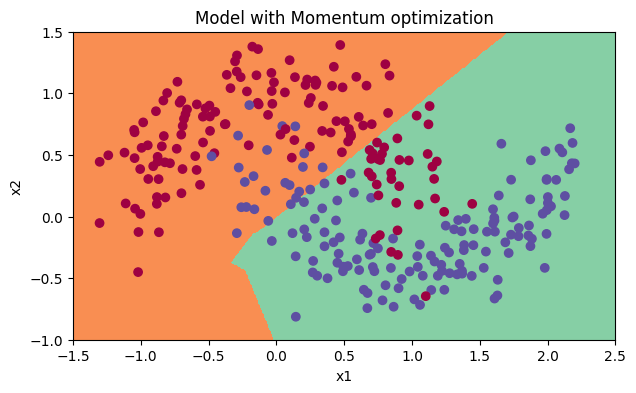

In [20]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

## 6.3 带Adam的小批量梯度下降

① 运行以下代码以查看使用Adam的模型表现

Cost after epoch 0: 0.690552
Cost after epoch 1000: 0.185501
Cost after epoch 2000: 0.150830
Cost after epoch 3000: 0.074454
Cost after epoch 4000: 0.125959
Cost after epoch 5000: 0.104344
Cost after epoch 6000: 0.100676
Cost after epoch 7000: 0.031652
Cost after epoch 8000: 0.111973
Cost after epoch 9000: 0.197940


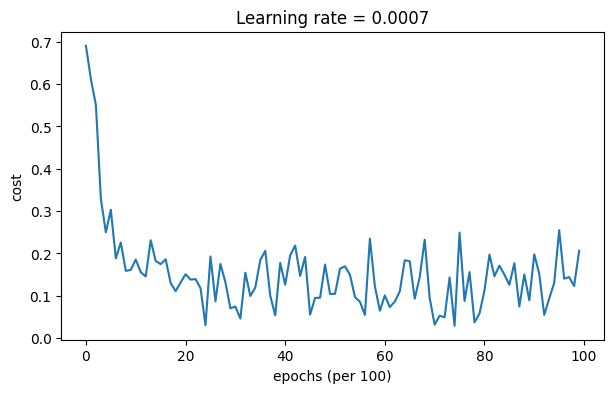

Accuracy: 0.94


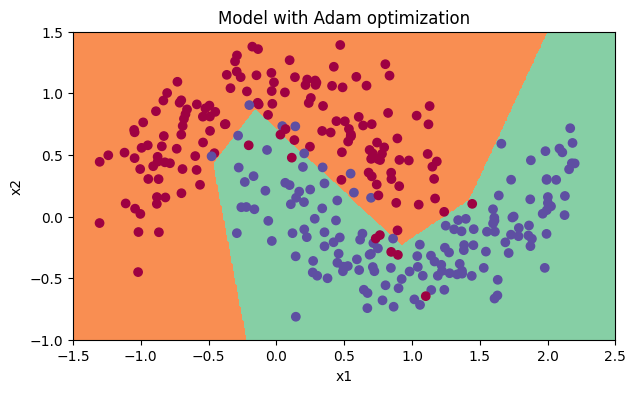

In [21]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")

# Predict
predictions = predict(train_X, train_Y, parameters)

# Plot decision boundary
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

## 6.4 总结

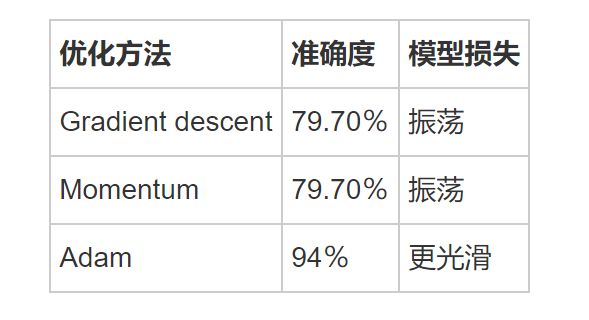

① 动量通常会有所帮助，但是鉴于学习率低和数据集过于简单，其影响几乎可以忽略不计。

② 同样，你看到损失的巨大波动是因为对于优化算法，某些小批处理比其他小批处理更为困难。

③ 另一方面，Adam明显胜过小批次梯度下降和动量。如果你在此简单数据集上运行更多epoch，则这三种方法都将产生非常好的结果。但是，Adam收敛得更快。

④ Adam的优势包括：

 - 相对较低的内存要求（尽管高于梯度下降和带动量的梯度下降）
 - 即使很少调整超参数，通常也能很好地工作（$\alpha$除外）